<a href="https://colab.research.google.com/github/jiw0n-lee/ESAA/blob/main/YB0404(2)_%E1%84%91%E1%85%A7%E1%86%BC%E1%84%80%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성

# 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

# 출력
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[337  20]
 [ 30 182]]


* 정확도

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
print("Precision:", precision)

Precision: 0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
print("Recall:", recall)

Recall: 0.8584905660377359


* F1 score

In [6]:
from sklearn.metrics import f1_score

# 예측값과 실제값
y_true = [0, 1, 1, 0, 1, 1, 0]  # 실제 값
y_pred = [0, 1, 0, 0, 1, 1, 1]  # 모델의 예측 값

# F1 점수 계산
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)

F1 Score: 0.75


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 실제값
y_true = [0, 1, 0, 1, 1]

# 예측 확률 [P(0), P(1)]
pred_proba = np.array([
    [0.15, 0.85],
    [0.08, 0.92],
    [0.3, 0.7],
    [0.05, 0.95],
    [0.2, 0.8]
])

# 클래스 0일 확률만 추출
class0_proba = pred_proba[:, 0].reshape(-1, 1)

# Binarizer로 threshold 0.1 초과 → 1로 설정
binarizer = Binarizer(threshold=0.1)
binarized = binarizer.transform(class0_proba)

# 조건: P(0) > 0.1 → 0으로 예측하므로 결과를 반전
y_pred2 = (1 - binarized).flatten()

In [8]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print("y_pred2:", y_pred2)
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred2))
print("Accuracy:", accuracy_score(y_true, y_pred2))
print("Precision:", precision_score(y_true, y_pred2))
print("Recall:", recall_score(y_true, y_pred2))
print("F1 Score:", f1_score(y_true, y_pred2))

y_pred2: [0. 1. 0. 1. 0.]
Confusion Matrix:
 [[2 0]
 [1 2]]
Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


* ROC 곡선 시각화

In [11]:
import matplotlib.pyplot as plt

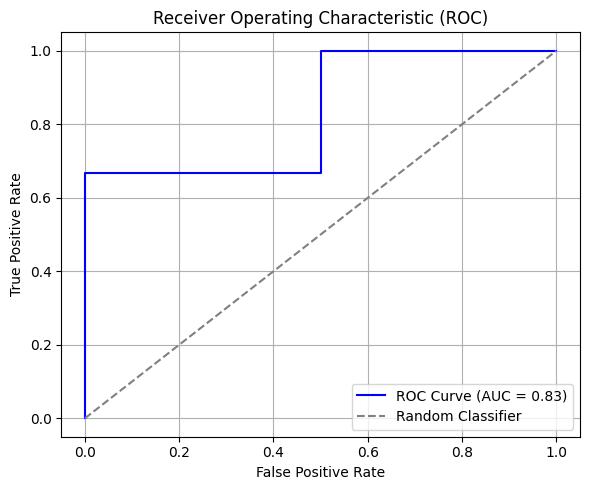

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_true: 실제 클래스 값
# pred_proba: 예측 확률 (여기서는 클래스 1에 대한 확률을 사용해야 함)
# 예: pred_proba = model.predict_proba(X_test)[:, 1]

# ROC 곡선용 FPR, TPR 계산
fpr, tpr, thresholds = roc_curve(y_true, pred_proba[:, 1])

# AUC (Area Under the Curve) 계산
roc_auc = roc_auc_score(y_true, pred_proba[:, 1])

# ROC 곡선 시각화
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

* ROC AUC 값

In [13]:
from sklearn.metrics import roc_auc_score

# y_true: 실제 정답 (0 또는 1)
# pred_proba[:, 1]: 클래스 1일 확률 (ROC는 항상 양성 클래스 기준)

roc_auc = roc_auc_score(y_true, pred_proba[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8333333333333333
